In [1]:
#import dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#read in zip csv's
zip30312 = "Weather_Traffic_Resources/30312_weather_traffic_FINAL.csv"
zip30339 = "Weather_Traffic_Resources/30339_weather_traffic_FINAL.csv"
zip30331 = "Weather_Traffic_Resources/30331_weather_traffic_FINAL.csv"
zip30315 = "Weather_Traffic_Resources/30315_weather_traffic_FINAL.csv"
zip30309 = "Weather_Traffic_Resources/30309_weather_traffic_FINAL.csv"
zip30340 = "Weather_Traffic_Resources/30340_weather_traffic_FINAL.csv"
zip30308 = "Weather_Traffic_Resources/30308_weather_traffic_FINAL.csv"
zip30324 = "Weather_Traffic_Resources/30324_weather_traffic_FINAL.csv"
zip30342 = "Weather_Traffic_Resources/30342_weather_traffic_FINAL.csv"
zip30318 = "Weather_Traffic_Resources/30318_weather_traffic_FINAL.csv"

zip30312_df = pd.read_csv(zip30312)
zip30339_df = pd.read_csv(zip30339)
zip30331_df = pd.read_csv(zip30331)
zip30315_df = pd.read_csv(zip30315)
zip30309_df = pd.read_csv(zip30309)
zip30340_df = pd.read_csv(zip30340)
zip30308_df = pd.read_csv(zip30308)
zip30324_df = pd.read_csv(zip30324)
zip30342_df = pd.read_csv(zip30342)
zip30318_df = pd.read_csv(zip30318)

zip30312_df.head()

,Unnamed: 0,Location,Address,Country,Date,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,...,Relative Humidity,Conditions,Severity_1,Severity_2,Severity_3,Severity_4,Residential_ct,Interstate_ct,Accident_ct,Zipcode
0,0,NaN,30312,USA,01/01/2019,65.1,56.4,61.5,NaN,NaN,...,90.30,"Rain, Partially cloudy",0,0,2,0,1,1,2,30312
1,1,NaN,30312,USA,01/02/2019,57.0,49.0,52.4,46.3,NaN,...,91.80,"Rain, Overcast",0,0,1,0,0,1,1,30312
2,2,NaN,30312,USA,01/03/2019,54.3,50.1,52.5,NaN,NaN,...,95.95,"Rain, Overcast",0,2,2,0,1,3,4,30312
3,3,NaN,30312,USA,01/04/2019,64.8,45.1,54.5,40.1,NaN,...,86.19,"Rain, Overcast",0,0,4,0,3,1,4,30312
4,4,NaN,30312,USA,01/05/2019,57.8,43.7,48.8,36.4,NaN,...,64.92,Partially cloudy,0,0,2,0,1,1,2,30312


In [3]:
#accidents with relative humidity over 80
HiHum30312 = zip30312_df.loc[zip30312_df['Relative Humidity'] > 80,['Relative Humidity','Accident_ct']]
HiHum30339 = zip30339_df.loc[zip30339_df['Relative Humidity'] > 80,['Relative Humidity','Accident_ct']]
HiHum30331 = zip30331_df.loc[zip30331_df['Relative Humidity'] > 80,['Relative Humidity','Accident_ct']]
HiHum30315 = zip30315_df.loc[zip30315_df['Relative Humidity'] > 80,['Relative Humidity','Accident_ct']]
HiHum30309 = zip30309_df.loc[zip30309_df['Relative Humidity'] > 80,['Relative Humidity','Accident_ct']]
HiHum30340 = zip30340_df.loc[zip30340_df['Relative Humidity'] > 80,['Relative Humidity','Accident_ct']]
HiHum30308 = zip30308_df.loc[zip30308_df['Relative Humidity'] > 80,['Relative Humidity','Accident_ct']]
HiHum30324 = zip30324_df.loc[zip30324_df['Relative Humidity'] > 80,['Relative Humidity','Accident_ct']]
HiHum30342 = zip30342_df.loc[zip30342_df['Relative Humidity'] > 80,['Relative Humidity','Accident_ct']]
HiHum30318 = zip30318_df.loc[zip30318_df['Relative Humidity'] > 80,['Relative Humidity','Accident_ct']]
HiHum30312.head()

,Relative Humidity,Accident_ct
0,90.30,2
1,91.80,1
2,95.95,4
3,86.19,4
12,91.84,1


In [4]:
# accidents with relative humidity under 80
LoHum30312 = zip30312_df.loc[zip30312_df['Relative Humidity'] < 80,['Relative Humidity','Accident_ct']]
LoHum30339 = zip30339_df.loc[zip30339_df['Relative Humidity'] < 80,['Relative Humidity','Accident_ct']]
LoHum30331 = zip30331_df.loc[zip30331_df['Relative Humidity'] < 80,['Relative Humidity','Accident_ct']]
LoHum30315 = zip30315_df.loc[zip30315_df['Relative Humidity'] < 80,['Relative Humidity','Accident_ct']]
LoHum30309 = zip30309_df.loc[zip30309_df['Relative Humidity'] < 80,['Relative Humidity','Accident_ct']]
LoHum30340 = zip30340_df.loc[zip30340_df['Relative Humidity'] < 80,['Relative Humidity','Accident_ct']]
LoHum30308 = zip30308_df.loc[zip30308_df['Relative Humidity'] < 80,['Relative Humidity','Accident_ct']]
LoHum30324 = zip30324_df.loc[zip30324_df['Relative Humidity'] < 80,['Relative Humidity','Accident_ct']]
LoHum30342 = zip30342_df.loc[zip30342_df['Relative Humidity'] < 80,['Relative Humidity','Accident_ct']]
LoHum30318 = zip30318_df.loc[zip30318_df['Relative Humidity'] < 80,['Relative Humidity','Accident_ct']]
LoHum30312.head()


,Relative Humidity,Accident_ct
4,64.92,2
5,62.19,3
6,67.52,0
7,77.43,5
8,41.08,4


The correlation between High Relative Humidity and accidents for zip code 30312 is 19.0%
slope: 0.107634  intercept: -5.725173
R-Squared: 0.036581
The correlation between Low Relative Humidity and accidents for zip code 30312 is -2.0%
slope: -0.005146  intercept: 2.682370
R-Squared: 0.000564


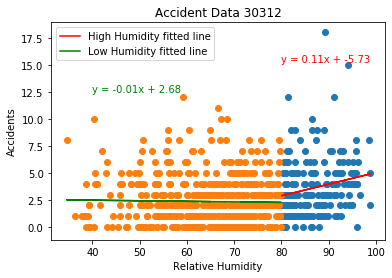

In [5]:
#high humidity 30312
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiHum30312['Relative Humidity'], HiHum30312['Accident_ct'])
regress_values = slope * HiHum30312['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiHum30312['Relative Humidity'], HiHum30312['Accident_ct'])
plt.plot(HiHum30312['Relative Humidity'], regress_values, color = 'red',label = "High Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(80,15.2),fontsize=10,color="red")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30312")
hi_corr_30312=round(st.pearsonr(HiHum30312['Relative Humidity'], HiHum30312['Accident_ct'])[0],2)*100
print(f"The correlation between High Relative Humidity and accidents for zip code 30312 is {hi_corr_30312}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

# low humidity 30312
(slope, intercept, rvalue, pvalue, stderr) = linregress(LoHum30312['Relative Humidity'], LoHum30312['Accident_ct'])
regress_values = slope * LoHum30312['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoHum30312['Relative Humidity'], LoHum30312['Accident_ct'])
plt.plot(LoHum30312['Relative Humidity'], regress_values, color = "green",label = "Low Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(40,12.5),fontsize=10,color="green")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30312")
lo_corr_30312=round(st.pearsonr(LoHum30312['Relative Humidity'], LoHum30312['Accident_ct'])[0],2)*100
print(f"The correlation between Low Relative Humidity and accidents for zip code 30312 is {lo_corr_30312}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)



The correlation between High Relative Humidity and accidents for zip code 30339 is 5.0%
slope: 0.016534  intercept: 0.232192
R-Squared: 0.002278
The correlation between Low Relative Humidity and accidents for zip code 30339 is 3.0%
slope: 0.005821  intercept: 1.137121
R-Squared: 0.000914


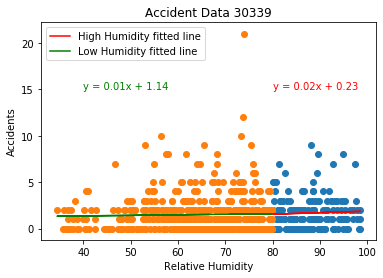

In [6]:
#high humidity 30339
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiHum30339['Relative Humidity'], HiHum30339['Accident_ct'])
regress_values = slope * HiHum30339['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiHum30339['Relative Humidity'], HiHum30339['Accident_ct'])
plt.plot(HiHum30339['Relative Humidity'], regress_values, color = 'red',label = "High Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(80,15),fontsize=10,color="red")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30339")
hi_corr_30339=round(st.pearsonr(HiHum30339['Relative Humidity'], HiHum30339['Accident_ct'])[0],2)*100
print(f"The correlation between High Relative Humidity and accidents for zip code 30339 is {hi_corr_30339}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

# low humidity 30339
(slope, intercept, rvalue, pvalue, stderr) = linregress(LoHum30339['Relative Humidity'], LoHum30339['Accident_ct'])
regress_values = slope * LoHum30339['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoHum30339['Relative Humidity'], LoHum30339['Accident_ct'])
plt.plot(LoHum30339['Relative Humidity'], regress_values, color = "green",label = "Low Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(40,15),fontsize=10,color="green")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30339")
lo_corr_30339=round(st.pearsonr(LoHum30339['Relative Humidity'], LoHum30339['Accident_ct'])[0],2)*100
print(f"The correlation between Low Relative Humidity and accidents for zip code 30339 is {lo_corr_30339}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Relative Humidity and accidents for zip code 30331 is 15.0%
slope: 0.049281  intercept: -2.281851
R-Squared: 0.021539
The correlation between Low Relative Humidity and accidents for zip code 30331 is 6.0%
slope: 0.009212  intercept: 0.956762
R-Squared: 0.003260


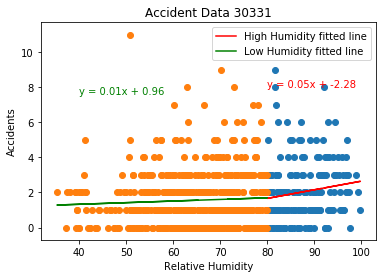

In [7]:
#high humidity 30331
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiHum30331['Relative Humidity'], HiHum30331['Accident_ct'])
regress_values = slope * HiHum30331['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiHum30331['Relative Humidity'], HiHum30331['Accident_ct'])
plt.plot(HiHum30331['Relative Humidity'], regress_values, color = 'red',label = "High Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(80,8),fontsize=10,color="red")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30331")
hi_corr_30331=round(st.pearsonr(HiHum30331['Relative Humidity'], HiHum30331['Accident_ct'])[0],2)*100
print(f"The correlation between High Relative Humidity and accidents for zip code 30331 is {hi_corr_30331}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low humidity 30331
(slope, intercept, rvalue, pvalue, stderr) = linregress(LoHum30331['Relative Humidity'], LoHum30331['Accident_ct'])
regress_values = slope * LoHum30331['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoHum30331['Relative Humidity'], LoHum30331['Accident_ct'])
plt.plot(LoHum30331['Relative Humidity'], regress_values, color = "green",label = "Low Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(40,7.6),fontsize=10,color="green")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30331")
lo_corr_30331=round(st.pearsonr(LoHum30331['Relative Humidity'], LoHum30331['Accident_ct'])[0],2)*100
print(f"The correlation between Low Relative Humidity and accidents for zip code 30331 is {lo_corr_30331}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Relative Humidity and accidents for zip code 30315 is 24.0%
slope: 0.126922  intercept: -8.314446
R-Squared: 0.059303
The correlation between Low Relative Humidity and accidents for zip code 30315 is 6.0%
slope: 0.010704  intercept: 0.935143
R-Squared: 0.003341


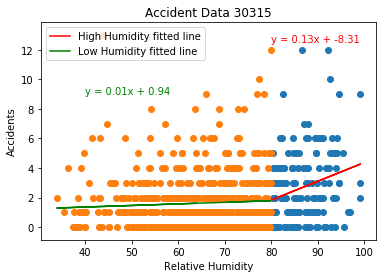

In [8]:
#high humidity 30315
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiHum30315['Relative Humidity'], HiHum30315['Accident_ct'])
regress_values = slope * HiHum30315['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiHum30315['Relative Humidity'], HiHum30315['Accident_ct'])
plt.plot(HiHum30315['Relative Humidity'], regress_values, color = 'red',label = "High Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(80,12.5),fontsize=10,color="red")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30315")
hi_corr_30315=round(st.pearsonr(HiHum30315['Relative Humidity'], HiHum30315['Accident_ct'])[0],2)*100
print(f"The correlation between High Relative Humidity and accidents for zip code 30315 is {hi_corr_30315}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)
#low humidity 30315
(slope, intercept, rvalue, pvalue, stderr) = linregress(LoHum30315['Relative Humidity'], LoHum30315['Accident_ct'])
regress_values = slope * LoHum30315['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoHum30315['Relative Humidity'], LoHum30315['Accident_ct'])
plt.plot(LoHum30315['Relative Humidity'], regress_values, color = "green",label = "Low Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(40,9),fontsize=10,color="green")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30315")
lo_corr_30315=round(st.pearsonr(LoHum30315['Relative Humidity'], LoHum30315['Accident_ct'])[0],2)*100
print(f"The correlation between Low Relative Humidity and accidents for zip code 30315 is {lo_corr_30315}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)
plt.savefig("Images/humidity_30315")

The correlation between High Relative Humidity and accidents for zip code 30309 is 18.0%
slope: 0.076154  intercept: -4.079740
R-Squared: 0.032724
The correlation between Low Relative Humidity and accidents for zip code 30309 is 7.000000000000001%
slope: 0.012030  intercept: 1.013667
R-Squared: 0.004377


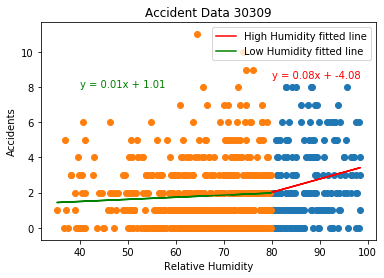

In [58]:
#high humidity 30309
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiHum30309['Relative Humidity'], HiHum30309['Accident_ct'])
regress_values = slope * HiHum30309['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiHum30309['Relative Humidity'], HiHum30309['Accident_ct'])
plt.plot(HiHum30309['Relative Humidity'], regress_values, color = 'red',label = "High Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(80,8.5),fontsize=10,color="red")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30309")
hi_corr_30309=round(st.pearsonr(HiHum30309['Relative Humidity'], HiHum30309['Accident_ct'])[0],2)*100
print(f"The correlation between High Relative Humidity and accidents for zip code 30309 is {hi_corr_30309}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low humidity 30309
(slope, intercept, rvalue, pvalue, stderr) = linregress(LoHum30309['Relative Humidity'], LoHum30309['Accident_ct'])
regress_values = slope * LoHum30309['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoHum30309['Relative Humidity'], LoHum30309['Accident_ct'])
plt.plot(LoHum30309['Relative Humidity'], regress_values, color = "green",label = "Low Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(40,8),fontsize=10,color="green")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30309")
lo_corr_30309=round(st.pearsonr(LoHum30309['Relative Humidity'], LoHum30309['Accident_ct'])[0],2)*100
print(f"The correlation between Low Relative Humidity and accidents for zip code 30309 is {lo_corr_30309}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Relative Humidity and accidents for zip code 30340 is 16.0%
slope: 0.077244  intercept: -4.802638
R-Squared: 0.026008
The correlation between Low Relative Humidity and accidents for zip code 30340 is 4.0%
slope: 0.007127  intercept: 0.872700
R-Squared: 0.001545


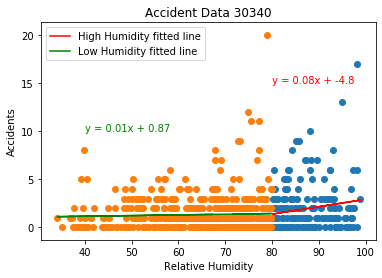

In [54]:
#high humidity 30340
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiHum30340['Relative Humidity'], HiHum30340['Accident_ct'])
regress_values = slope * HiHum30340['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiHum30340['Relative Humidity'], HiHum30340['Accident_ct'])
plt.plot(HiHum30340['Relative Humidity'], regress_values, color = 'red',label = "High Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(80,15),fontsize=10,color="red")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30340")
hi_corr_30340=round(st.pearsonr(HiHum30340['Relative Humidity'], HiHum30340['Accident_ct'])[0],2)*100
print(f"The correlation between High Relative Humidity and accidents for zip code 30340 is {hi_corr_30340}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low humidity 30340
(slope, intercept, rvalue, pvalue, stderr) = linregress(LoHum30340['Relative Humidity'], LoHum30340['Accident_ct'])
regress_values = slope * LoHum30340['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoHum30340['Relative Humidity'], LoHum30340['Accident_ct'])
plt.plot(LoHum30340['Relative Humidity'], regress_values, color = "green",label = "Low Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(40,10),fontsize=10,color="green")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30340")
lo_corr_30340=round(st.pearsonr(LoHum30340['Relative Humidity'], LoHum30340['Accident_ct'])[0],2)*100
print(f"The correlation between Low Relative Humidity and accidents for zip code 30340 is {lo_corr_30340}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)


The correlation between High Relative Humidity and accidents for zip code 30308 is 14.000000000000002%
slope: 0.051650  intercept: -2.336279
R-Squared: 0.018413
The correlation between Low Relative Humidity and accidents for zip code 30308 is 2.0%
slope: 0.002941  intercept: 1.363877
R-Squared: 0.000313


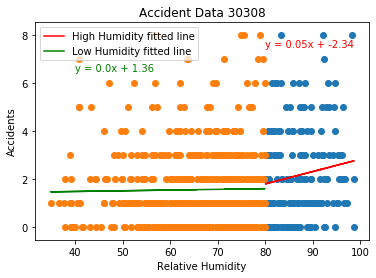

In [53]:
#high humidity 30308
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiHum30308['Relative Humidity'], HiHum30308['Accident_ct'])
regress_values = slope * HiHum30308['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiHum30308['Relative Humidity'], HiHum30308['Accident_ct'])
plt.plot(HiHum30308['Relative Humidity'], regress_values, color = 'red',label = "High Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(80,7.5),fontsize=10,color="red")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30308")
hi_corr_30308=round(st.pearsonr(HiHum30308['Relative Humidity'], HiHum30308['Accident_ct'])[0],2)*100
print(f"The correlation between High Relative Humidity and accidents for zip code 30308 is {hi_corr_30308}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low humidity 30308
(slope, intercept, rvalue, pvalue, stderr) = linregress(LoHum30308['Relative Humidity'], LoHum30308['Accident_ct'])
regress_values = slope * LoHum30308['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoHum30308['Relative Humidity'], LoHum30308['Accident_ct'])
plt.plot(LoHum30308['Relative Humidity'], regress_values, color = "green",label = "Low Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(40,6.5),fontsize=10,color="green")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30308")
lo_corr_30308=round(st.pearsonr(LoHum30308['Relative Humidity'], LoHum30308['Accident_ct'])[0],2)*100
print(f"The correlation between Low Relative Humidity and accidents for zip code 30308 is {lo_corr_30308}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Relative Humidity and accidents for zip code 30324 is 8.0%
slope: 0.027696  intercept: -0.570287
R-Squared: 0.006196
The correlation between Low Relative Humidity and accidents for zip code 30324 is -7.000000000000001%
slope: -0.012828  intercept: 2.431710
R-Squared: 0.004713


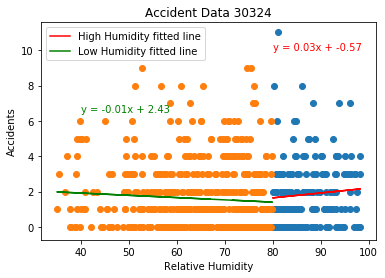

In [51]:
#high humidity 30324
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiHum30324['Relative Humidity'], HiHum30324['Accident_ct'])
regress_values = slope * HiHum30324['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiHum30324['Relative Humidity'], HiHum30324['Accident_ct'])
plt.plot(HiHum30324['Relative Humidity'], regress_values, color = 'red',label = "High Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(80,10),fontsize=10,color="red")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30324")
hi_corr_30324=round(st.pearsonr(HiHum30324['Relative Humidity'], HiHum30324['Accident_ct'])[0],2)*100
print(f"The correlation between High Relative Humidity and accidents for zip code 30324 is {hi_corr_30324}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low humidity 30324
(slope, intercept, rvalue, pvalue, stderr) = linregress(LoHum30324['Relative Humidity'], LoHum30324['Accident_ct'])
regress_values = slope * LoHum30324['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoHum30324['Relative Humidity'], LoHum30324['Accident_ct'])
plt.plot(LoHum30324['Relative Humidity'], regress_values, color = "green",label = "Low Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(40,6.5),fontsize=10,color="green")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30324")
lo_corr_30324=round(st.pearsonr(LoHum30324['Relative Humidity'], LoHum30324['Accident_ct'])[0],2)*100
print(f"The correlation between Low Relative Humidity and accidents for zip code 30324 is {lo_corr_30324}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Relative Humidity and accidents for zip code 30342 is 17.0%
slope: 0.044831  intercept: -2.639281
R-Squared: 0.028252
The correlation between Low Relative Humidity and accidents for zip code 30342 is 5.0%
slope: 0.005854  intercept: 0.636591
R-Squared: 0.002052


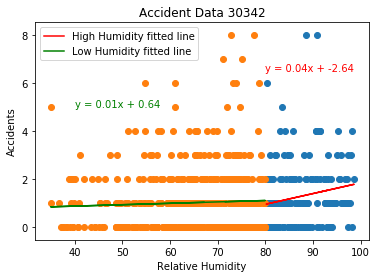

In [47]:
#high humidity 30342
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiHum30342['Relative Humidity'], HiHum30342['Accident_ct'])
regress_values = slope * HiHum30342['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiHum30342['Relative Humidity'], HiHum30342['Accident_ct'])
plt.plot(HiHum30342['Relative Humidity'], regress_values, color = 'red',label = "High Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(80,6.5),fontsize=10,color="red")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30342")
hi_corr_30342=round(st.pearsonr(HiHum30342['Relative Humidity'], HiHum30342['Accident_ct'])[0],2)*100
print(f"The correlation between High Relative Humidity and accidents for zip code 30342 is {hi_corr_30342}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low humidity 30342
(slope, intercept, rvalue, pvalue, stderr) = linregress(LoHum30342['Relative Humidity'], LoHum30342['Accident_ct'])
regress_values = slope * LoHum30342['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoHum30342['Relative Humidity'], LoHum30342['Accident_ct'])
plt.plot(LoHum30342['Relative Humidity'], regress_values, color = "green",label = "Low Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(40,5),fontsize=10,color="green")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30342")
lo_corr_30342=round(st.pearsonr(LoHum30342['Relative Humidity'], LoHum30342['Accident_ct'])[0],2)*100
print(f"The correlation between Low Relative Humidity and accidents for zip code 30342 is {lo_corr_30342}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Relative Humidity and accidents for zip code 30318 is 22.0%
slope: 0.066825  intercept: -4.358978
R-Squared: 0.049280
The correlation between Low Relative Humidity and accidents for zip code 30318 is 3.0%
slope: 0.003937  intercept: 0.878679
R-Squared: 0.000884


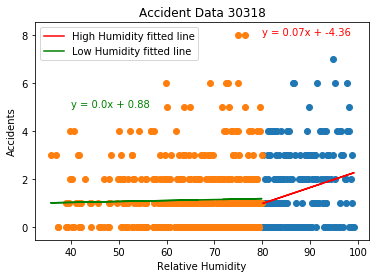

In [48]:
#high humidity 30318
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiHum30318['Relative Humidity'], HiHum30318['Accident_ct'])
regress_values = slope * HiHum30318['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiHum30318['Relative Humidity'], HiHum30318['Accident_ct'])
plt.plot(HiHum30318['Relative Humidity'], regress_values, color = 'red',label = "High Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(80,8),fontsize=10,color="red")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30318")
hi_corr_30318=round(st.pearsonr(HiHum30318['Relative Humidity'], HiHum30318['Accident_ct'])[0],2)*100
print(f"The correlation between High Relative Humidity and accidents for zip code 30318 is {hi_corr_30318}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low humidity 30318

(slope, intercept, rvalue, pvalue, stderr) = linregress(LoHum30318['Relative Humidity'], LoHum30318['Accident_ct'])
regress_values = slope * LoHum30318['Relative Humidity'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoHum30318['Relative Humidity'], LoHum30318['Accident_ct'])
plt.plot(LoHum30318['Relative Humidity'], regress_values, color = "green",label = "Low Humidity fitted line")
plt.legend()
plt.annotate(line_eq,(40,5),fontsize=10,color="green")
plt.xlabel("Relative Humidity")
plt.ylabel("Accidents")
plt.title("Accident Data 30318")
lo_corr_30318=round(st.pearsonr(LoHum30318['Relative Humidity'], LoHum30318['Accident_ct'])[0],2)*100
print(f"The correlation between Low Relative Humidity and accidents for zip code 30318 is {lo_corr_30318}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)